In [4]:
# Read the datasets
import pandas as pd

df_train = pd.read_excel("E-Commerce_train.xlsx")
df_test = pd.read_excel("E-Commerce_test.xlsx")

In [5]:
#Let's have a look at a couple of samples
df_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


In [6]:
# Let's remove column ID since it is not informative to make predictions
df_test = df_test.drop(['ID'], axis=1)
df_train = df_train.drop(['ID'], axis=1)

In [7]:
# Let's make all columns numerical. First, let's turn ordinal variables into numbers
df_train = df_train.replace({'low': 1, 'medium' : 2, 'high' : 3})
df_test = df_test.replace({'low': 1, 'medium' : 2, 'high' : 3 })

# Second, let's turn categorical variables with no ordering into dummies
df_train = pd.get_dummies(df_train,columns=["Warehouse_block","Mode_of_Shipment"])
df_test = pd.get_dummies(df_test,columns=["Warehouse_block","Mode_of_Shipment"])

# Let's turn Gender into 0-1 and drop first column 
df_train = pd.get_dummies(df_train,columns=["Gender"],drop_first=True)
df_test = pd.get_dummies(df_test,columns=["Gender"],drop_first=True)

# Let's see overall statistics
df_train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,1.613846,15.097678,3584.364596,0.635515,0.166685,0.166685,0.166685,0.166685,0.333259,0.160796,0.158907,0.680298,0.495499
std,1.138934,1.413143,48.289172,1.532074,0.649783,17.400040,1614.750194,0.481312,0.372715,0.372715,0.372715,0.372715,0.471405,0.367363,0.365609,0.466387,0.500008
min,2.000000,1.000000,96.000000,2.000000,1.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,1.000000,4.000000,1857.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,2.000000,8.000000,4046.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,4.000000,249.500000,4.000000,2.000000,19.000000,4999.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,3.000000,65.000000,7846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Customer_care_calls'}>,
        <AxesSubplot:title={'center':'Customer_rating'}>,
        <AxesSubplot:title={'center':'Cost_of_the_Product'}>,
        <AxesSubplot:title={'center':'Prior_purchases'}>],
       [<AxesSubplot:title={'center':'Product_importance'}>,
        <AxesSubplot:title={'center':'Discount_offered'}>,
        <AxesSubplot:title={'center':'Weight_in_gms'}>,
        <AxesSubplot:title={'center':'Reached.on.Time_Y.N'}>],
       [<AxesSubplot:title={'center':'Warehouse_block_A'}>,
        <AxesSubplot:title={'center':'Warehouse_block_B'}>,
        <AxesSubplot:title={'center':'Warehouse_block_C'}>,
        <AxesSubplot:title={'center':'Warehouse_block_D'}>],
       [<AxesSubplot:title={'center':'Warehouse_block_F'}>,
        <AxesSubplot:title={'center':'Mode_of_Shipment_Flight'}>,
        <AxesSubplot:title={'center':'Mode_of_Shipment_Road'}>,
        <AxesSubplot:title={'center':'Mode_of_Shipment_Ship'}>],
       [<AxesSubplot:tit

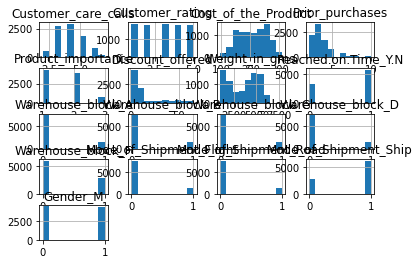

In [8]:
# Let's plot an histogram of each column
df_train.hist()

Observations from the histograms:
- (last plot) our dataset is IMBALANCED -  there are more records on time and not on time

In [9]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Train the model on training data
rf = RandomForestClassifier(n_estimators = 1000, oob_score = True)
df_train_features = df_train.drop(['Reached.on.Time_Y.N'], axis=1)
rf.fit(df_train_features, df_train['Reached.on.Time_Y.N']);

In [10]:
# Get estimation on accuracy FROM TRAINING DATA (Also known as OOB Score)
print('Mean accuracy IN TRAINING DATASET: ', rf.score(df_train_features, df_train['Reached.on.Time_Y.N']))
print('Estimated accuracy IN TEST: ', rf.oob_score_)

Mean accuracy IN TRAINING DATASET:  1.0
Estimated accuracy IN TEST:  0.6940771196799644


In [11]:
# Let's save prediction on a csv file
df_test_features = df_test
y_pred = rf.predict(df_test)
len(y_pred)

2000

In [12]:
file = pd.DataFrame(y_pred, columns = ['pred'])

file.to_csv('sebagodoy1.csv', index = False)